## I imported the following packages to be used within the dataset.

In [65]:
from IPython.display import display
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()

## The .csv file was uploaded and converted to a dataframe after removing nulls.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving personalfinance_export2.csv to personalfinance_export2.csv


In [7]:
import io
personalfinance = pd.read_csv(io.BytesIO(uploaded['personalfinance_export2.csv']))

In [15]:
print(personalfinance.shape)

(500, 8)


In [43]:
new_df = personalfinance.dropna()
print(new_df.shape)

(497, 8)


## Title/weekly thread posts were removed as these were treated as outliers.

In [44]:
new_df = new_df[new_df["title"].str.contains("Thread") == False]
print(new_df.shape)

(495, 8)


In [45]:
new_df = new_df[new_df["title"].str.contains("Read this first") == False]
print(new_df.shape)

(494, 8)


In [ ]:
display(new_df)

## Upon examining the dataset, I noticed that initially, the **created** column was in Unix timestamp format (int64). It was converted to a datetime format instead.

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 2 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         494 non-null    object        
 1   score         494 non-null    int64         
 2   id            494 non-null    object        
 3   subreddit     494 non-null    object        
 4   url           494 non-null    object        
 5   num_comments  494 non-null    int64         
 6   body          494 non-null    object        
 7   created       494 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 34.7+ KB


In [50]:
new_df['created']=(pd.to_datetime(new_df['created'],unit='s'))

## For EDA purposes, the ID column was removed.

In [57]:
new_df.drop(columns=['id'], inplace=True)

## An initial word cloud was created from the **title** column to see which words are present. Afterwards, some cleaning was performed to compare results.

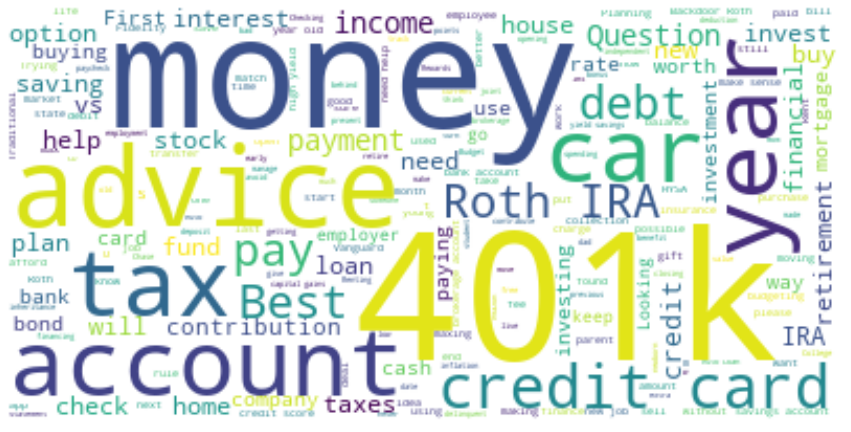

In [61]:
text = " ".join(i for i in new_df.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
print(text)

way behind on retirement I disputed unfamiliar Amazon charges as fraud on my credit card. Then I found out that a young relative accidentally used my card on their own account. How do I fix this? Help me to live frugally again 40% flat increase on new job offer Cancelled Flights: Options Made 39k first year being Self-Employed, is it worth it? I have a sibling who is not responsible with money. They will have a baby soon, instead of gifts what type of account can I start where no one will have access? Does my 2023 investing/saving plan avoid “lifestyle creep” Car insurance increased by nearly 50%? Best way to sell a used car? Should i pay off mortgage (6%+ interest) or put money aside for investing? What percentage of my paycheck should I be investing, and saving? I have no debts and a 6 mo. Emergency fund* Bank Statements show my parent's name on it? Advice on debt please? Child gifted money by Grandparents, best way to grow? First stable job; here's the plan, what y'all think? dimini

## Punctuation was removed and a dataframe containing only the relevant words (i.e. stop words removed) was created.

In [67]:
test_str = text.translate(str.maketrans('', '', string.punctuation))
print(test_str)

way behind on retirement I disputed unfamiliar Amazon charges as fraud on my credit card Then I found out that a young relative accidentally used my card on their own account How do I fix this Help me to live frugally again 40 flat increase on new job offer Cancelled Flights Options Made 39k first year being SelfEmployed is it worth it I have a sibling who is not responsible with money They will have a baby soon instead of gifts what type of account can I start where no one will have access Does my 2023 investingsaving plan avoid “lifestyle creep” Car insurance increased by nearly 50 Best way to sell a used car Should i pay off mortgage 6 interest or put money aside for investing What percentage of my paycheck should I be investing and saving I have no debts and a 6 mo Emergency fund Bank Statements show my parents name on it Advice on debt please Child gifted money by Grandparents best way to grow First stable job heres the plan what yall think diminished value claim Reported as Delin

In [69]:
test_li = test_str.split(" ")
print(test_li)

['way', 'behind', 'on', 'retirement', 'I', 'disputed', 'unfamiliar', 'Amazon', 'charges', 'as', 'fraud', 'on', 'my', 'credit', 'card', 'Then', 'I', 'found', 'out', 'that', 'a', 'young', 'relative', 'accidentally', 'used', 'my', 'card', 'on', 'their', 'own', 'account', 'How', 'do', 'I', 'fix', 'this', 'Help', 'me', 'to', 'live', 'frugally', 'again', '40', 'flat', 'increase', 'on', 'new', 'job', 'offer', 'Cancelled', 'Flights', 'Options', 'Made', '39k', 'first', 'year', 'being', 'SelfEmployed', 'is', 'it', 'worth', 'it', 'I', 'have', 'a', 'sibling', 'who', 'is', 'not', 'responsible', 'with', 'money', 'They', 'will', 'have', 'a', 'baby', 'soon', 'instead', 'of', 'gifts', 'what', 'type', 'of', 'account', 'can', 'I', 'start', 'where', 'no', 'one', 'will', 'have', 'access', 'Does', 'my', '2023', 'investingsaving', 'plan', 'avoid', '“lifestyle', 'creep”', 'Car', 'insurance', 'increased', 'by', 'nearly', '50', 'Best', 'way', 'to', 'sell', 'a', 'used', 'car', 'Should', 'i', 'pay', 'off', 'mortg

In [70]:
title_df = pd.DataFrame(test_li, columns = ['words'])
print(title_df)

           words
0            way
1         behind
2             on
3     retirement
4              I
...          ...
4707  Dealership
4708      ripped
4709          me
4710         off
4711   yesterday

[4712 rows x 1 columns]


In [72]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
stop_words = set(stopwords.words('english'))

print(stop_words)

{'about', 'being', 'have', 're', 'how', 'y', 'the', 'ours', 'this', 'on', 'why', 'herself', 'a', 'into', 'then', 'few', 'all', 'before', 've', 'ma', 'nor', 'myself', 'other', 'i', 'or', 'be', "isn't", 'her', 'any', 'itself', 'no', 'should', 'which', 'above', 'it', "you'd", 'an', 'didn', "couldn't", 'such', 'just', "don't", "you'll", 'too', 'you', "should've", 'during', 'm', 'whom', 'between', "shouldn't", 'at', 'doing', 'in', 'here', "haven't", 'ourselves', 'mightn', "that'll", 'yours', "mightn't", 'further', 'if', 'theirs', 'more', "mustn't", 'yourselves', 'but', 'over', 'his', 'there', 'so', 'doesn', 'against', 'that', "shan't", "you're", "hadn't", 'with', 'again', "wouldn't", 'were', 'up', 'don', 'my', 'him', 'yourself', 'are', 'once', "doesn't", 'not', 'where', 'by', 'while', 'weren', 'll', 'for', 'was', 'down', 'is', 'shouldn', 'what', 'to', 'its', "aren't", 'each', 'we', 'mustn', 'through', 'both', 'very', 'from', "didn't", 'couldn', 'some', 'after', "wasn't", 'because', 'when', 

In [84]:
title_df = title_df.dropna()
title_df['words'].replace(' ', np.nan, inplace=True)
title_df['words'] = title_df['words'].str.lower()
display(title_df)

,words
0,way
1,behind
3,retirement
4,i
5,disputed
...,...
4705,tax
4706,question
4707,dealership
4708,ripped


In [91]:
 title_df['words'] = title_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
 title_df['words'].replace('', np.nan, inplace=True)
 title_df = title_df.dropna()
 display(title_df)

,words
0,way
1,behind
3,retirement
5,disputed
6,unfamiliar
...,...
4705,tax
4706,question
4707,dealership
4708,ripped


## Another word cloud was created to compare. There are few noticeable differences with the original word cloud. Interestingly, most of the post titles in this subreddit pertained to US-specific personal finance concerns.

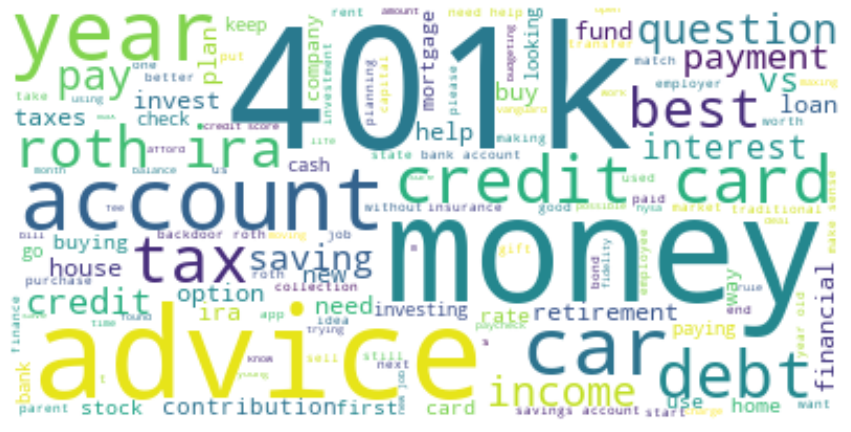

In [94]:
title_text = " ".join(i for i in title_df.words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(title_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Frequencies of each word were quantified.

In [125]:
title_count = pd.DataFrame(title_df['words'].value_counts())
title_count.columns = ['words']
display(title_count)

,words
credit,46
401k,40
roth,38
account,38
ira,35
...,...
reaffirmation,1
bankruptcy,1
taking,1
effective,1


## The same steps were repeated for the body text. The most frequent words in the word clouds are similar.

In [134]:
body_text = " ".join(i for i in new_df.body)
body_str = body_text.translate(str.maketrans('', '', string.punctuation))
body_test_li =body_str.split(" ")
body_df = pd.DataFrame(body_test_li, columns = ['words'])
body_df['words'] = body_df['words'].str.lower()
body_df['words'] = body_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
body_df['words'].replace('', np.nan, inplace=True)
body_df = body_df.dropna()
display(body_df)

,words
0,hello
1,42m
3,got
4,literally
5,6k
...,...
66973,since
66975,don’t
66976,want
66978,finance


In [172]:
body_count = pd.DataFrame(body_df['words'].value_counts())
body_count.columns = ['words']
display(body_count)

,words
would,320
money,254
im,250
credit,244
year,234
...,...
commuting,1
addons,1
498,1
disclose,1


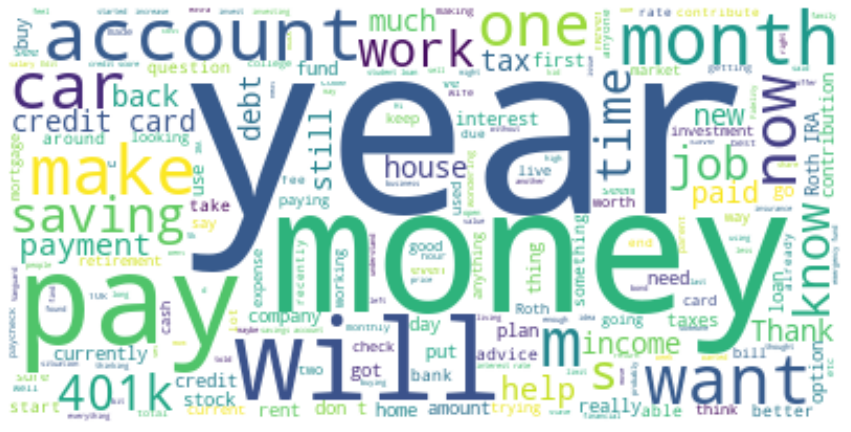

In [137]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(body_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [143]:
new_df['created date'] = new_df['created'].dt.date
new_df['created hour'] = new_df['created'].dt.hour
display(new_df)

,title,score,num_comments,body,created,created date,created hour
2,way behind on retirement,306,118,Hello. 42m. Got literally 6k in savings and t...,2022-12-26 18:03:05,2022-12-26,18
3,I disputed unfamiliar Amazon charges as fraud ...,387,61,***Update: I was able to contact Capital One a...,2022-12-26 06:19:05,2022-12-26,6
4,Help me to live frugally again,66,28,"In 2022 I made 90k, but I’m saving less than I...",2022-12-26 15:28:00,2022-12-26,15
5,40% flat increase on new job offer,90,46,"Hi all,\n\nI am a consultant in Cyber Sec. I l...",2022-12-26 11:35:22,2022-12-26,11
6,Cancelled Flights: Options,29,48,Booked flights for Christmas from Albuquerque ...,2022-12-26 17:24:46,2022-12-26,17
...,...,...,...,...,...,...,...
495,Can I apply to multiple credit unions or deale...,3,10,"I want to apply for financing for a car, I see...",2022-12-23 13:04:47,2022-12-23,13
496,[US][MI] Paying Off Mortgage,0,1,"I am currently located in the United States, i...",2022-12-23 18:57:19,2022-12-23,18
497,random IRS refund in late NOV,1,6,"Hey all, I received a tax refund randomly from...",2022-12-23 18:52:55,2022-12-23,18
498,Doordash tax question,1,4,I’m a door dash drives (independent contractor...,2022-12-23 18:32:20,2022-12-23,18


## As the data only encompassed a 5-day period, I tried to view the hourly pattern of the posts as they were created. The posts were more frequent in the 16:00 to 21:00 UTC timeframe, and this would be 11:00 to 16:00 EST. The activity in the subreddit coincides with waking hours in the US.

In [153]:
post_hour_count = pd.DataFrame(new_df['created hour'].value_counts())
display(post_hour_count)

,created hour
20,49
18,41
19,41
21,36
16,29
15,25
3,25
17,25
2,25
5,22


(array([60., 41., 33., 21., 14., 20., 75., 66., 90., 74.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

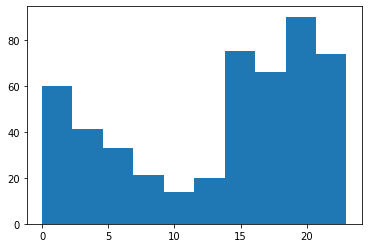

In [155]:
plt.hist(new_df['created hour'])

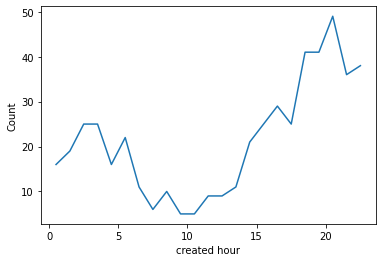

In [166]:
import seaborn as sb

sb.histplot(new_df['created hour'], element = 'poly', fill = False, bins = 24, binwidth = 1)

## No scores were in the negatives, meaning no posts consisted of more downvotes than upvotes. Most posts have single-digit scores, which could mean that there was little interaction with them or there were downvotes that cancelled out any upvotes. 

### *There are some posts with thousands of upvotes but these are very few in comparison.*

In [173]:
score_count = pd.DataFrame(new_df['score'].value_counts())
display(score_count)

,score
0,160
1,115
2,63
3,35
4,21
5,14
6,8
8,7
7,7
9,4


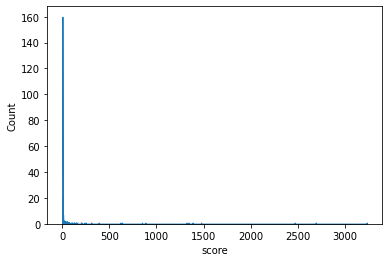

In [170]:
sb.histplot(new_df['score'], element = 'poly', fill = True)

## Posts generally have comment threads, which could consist of answers to their concerns. It would be good to see what the comments are, if it is possible to still scrape them.

In [168]:
comment_count = pd.DataFrame(new_df['num_comments'].value_counts())
display(comment_count)

,num_comments
4,40
10,36
7,35
3,33
5,32
...,...
29,1
56,1
184,1
76,1


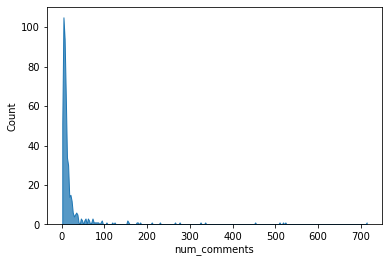

In [171]:
sb.histplot(new_df['num_comments'], element = 'poly', fill = True)